In [8]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv"

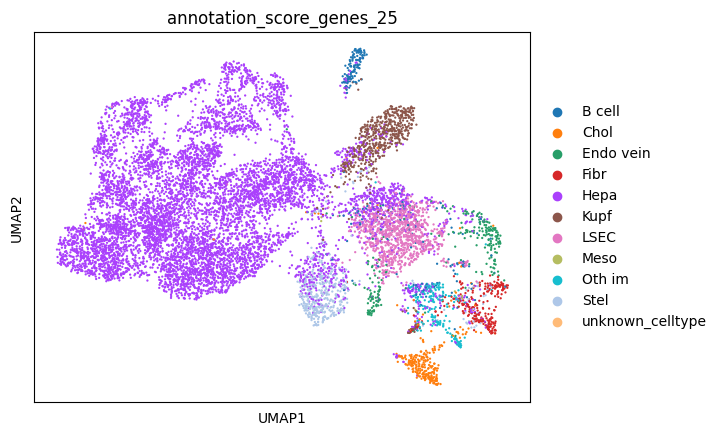

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             2.235483
Chol                               2.431421
Endo vein                          2.253295
Fibr                               2.190951
Hepa                              70.876380
Kupf                               5.343783
LSEC                               9.120057
Meso                               0.062344
Oth im                             1.710011
Stel                               3.767367
unknown_celltype                   0.008906


In [5]:
# Original score_genes
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa         0.642056
LSEC         0.126024
Stel         0.062968
Kupf         0.056644
Fibr         0.024403
Chol         0.022800
Endo vein    0.020217
Oth im       0.019505
B cell       0.015319
Unknown      0.006056
Meso         0.004008
Name: annotation_own_score_genes, dtype: float64


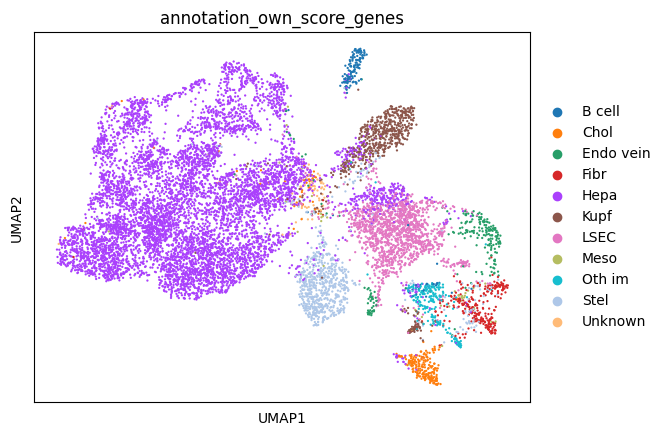

0.052101888136800854


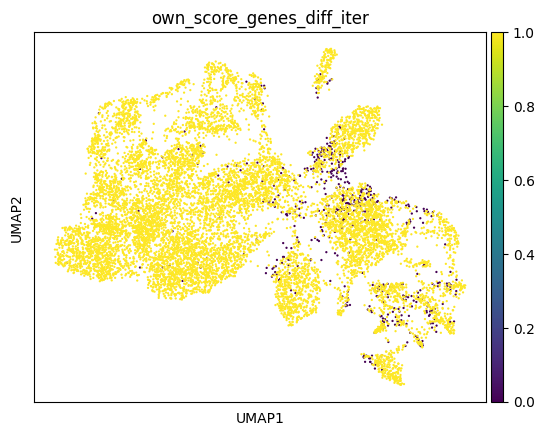

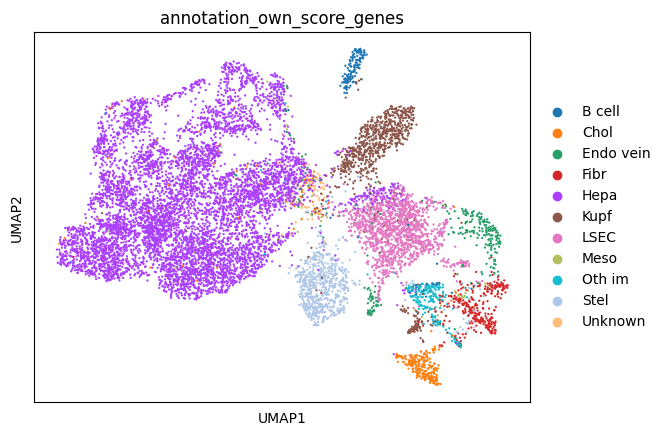

Hepa         0.614357
LSEC         0.127271
Kupf         0.074190
Stel         0.059049
Fibr         0.028322
Chol         0.026630
Endo vein    0.024314
Oth im       0.018970
B cell       0.016566
Unknown      0.006056
Meso         0.004275
Name: annotation_own_score_genes, dtype: float64
0.007926612041325259


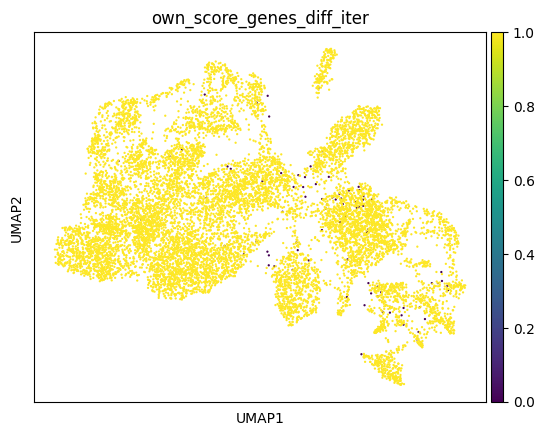

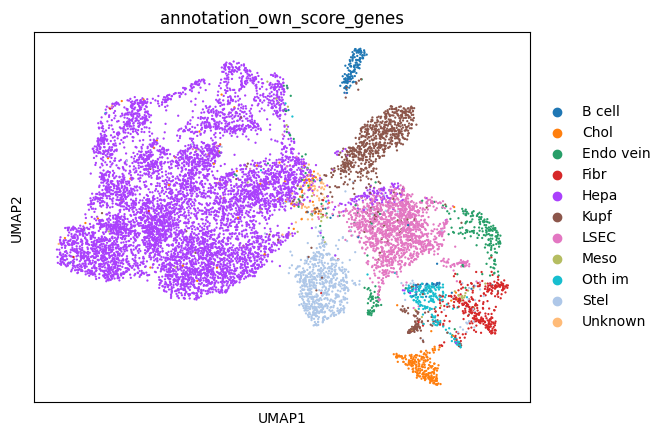

Hepa         0.609993
LSEC         0.127716
Kupf         0.076416
Stel         0.059494
Fibr         0.029658
Chol         0.027253
Endo vein    0.024403
Oth im       0.018258
B cell       0.016477
Unknown      0.006056
Meso         0.004275
Name: annotation_own_score_genes, dtype: float64
0.0010687566797292483


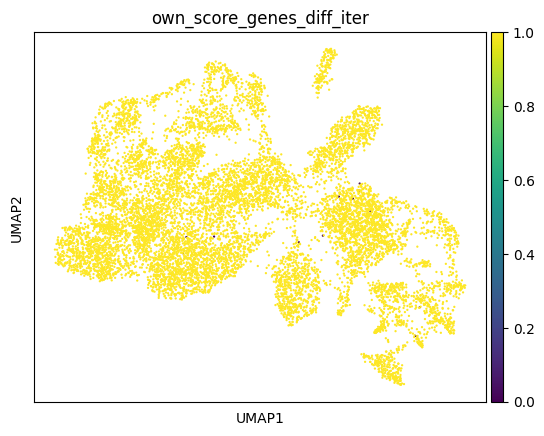

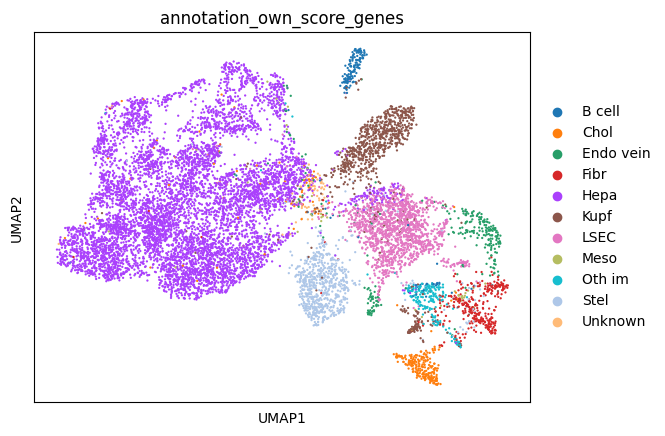

Hepa         0.609369
LSEC         0.127895
Kupf         0.076683
Stel         0.059672
Fibr         0.029836
Chol         0.027164
Endo vein    0.024314
Oth im       0.018258
B cell       0.016477
Unknown      0.006056
Meso         0.004275
Name: annotation_own_score_genes, dtype: float64
0.00026718916993231207


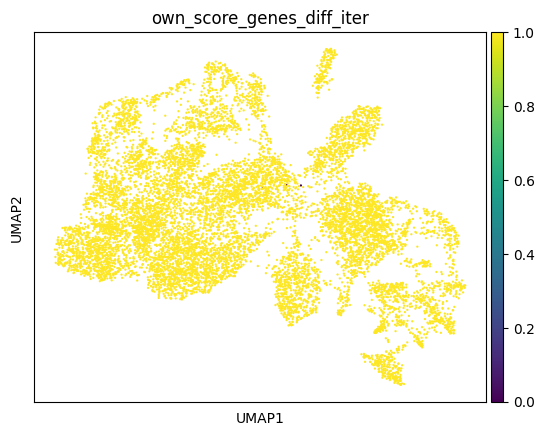

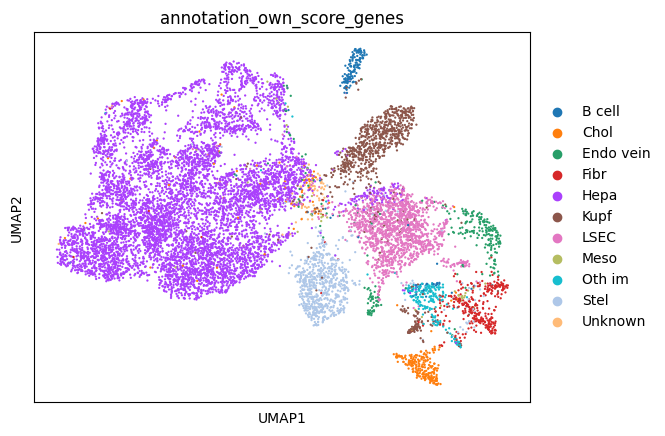

Hepa         0.609102
LSEC         0.127984
Kupf         0.076683
Stel         0.059761
Fibr         0.029836
Chol         0.027253
Endo vein    0.024314
Oth im       0.018258
B cell       0.016477
Unknown      0.006056
Meso         0.004275
Name: annotation_own_score_genes, dtype: float64
converged


[0.052101888136800854,
 0.007926612041325259,
 0.0010687566797292483,
 0.00026718916993231207,
 0]

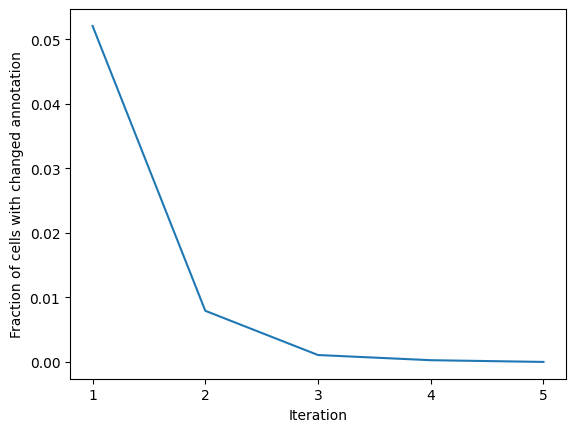

In [9]:
# Own score genes iterative
scores = own_score_genes_iterative(sdata.table,path_mg,nr_iterations=8)

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         17.625
B cell        4.500
Meso          6.000
Oth im        4.000
dtype: float64


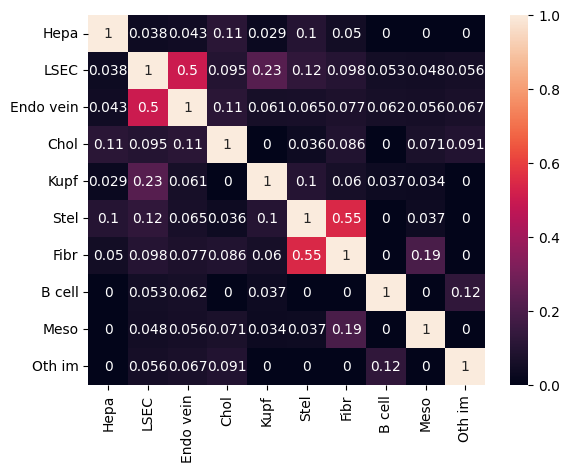

In [12]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

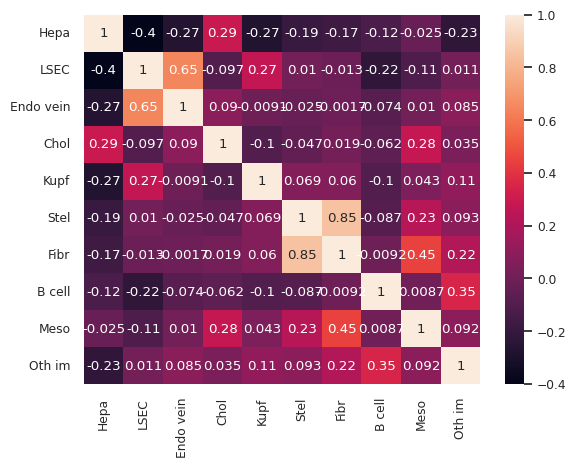

In [15]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

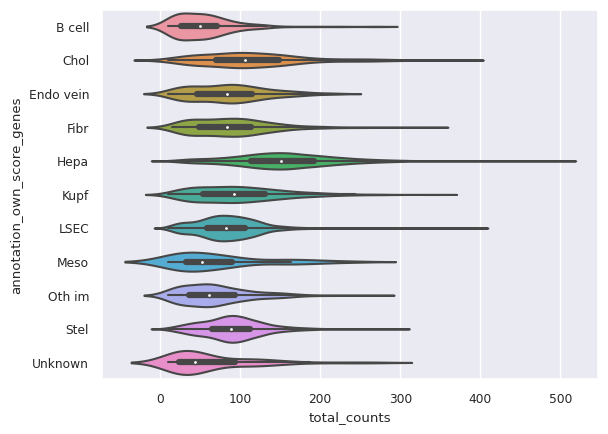

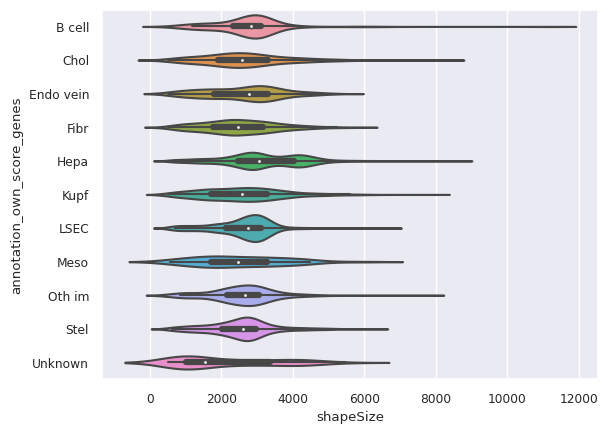

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

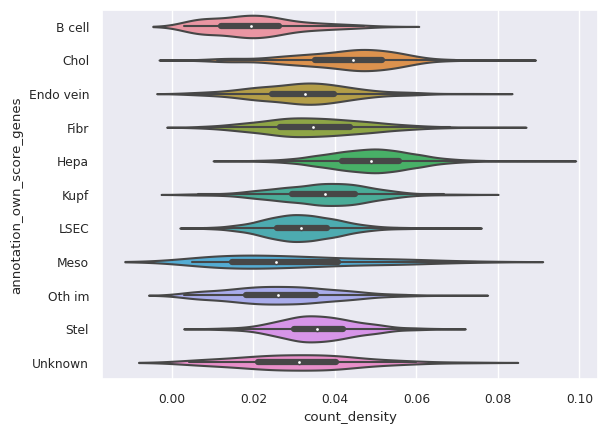

In [16]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

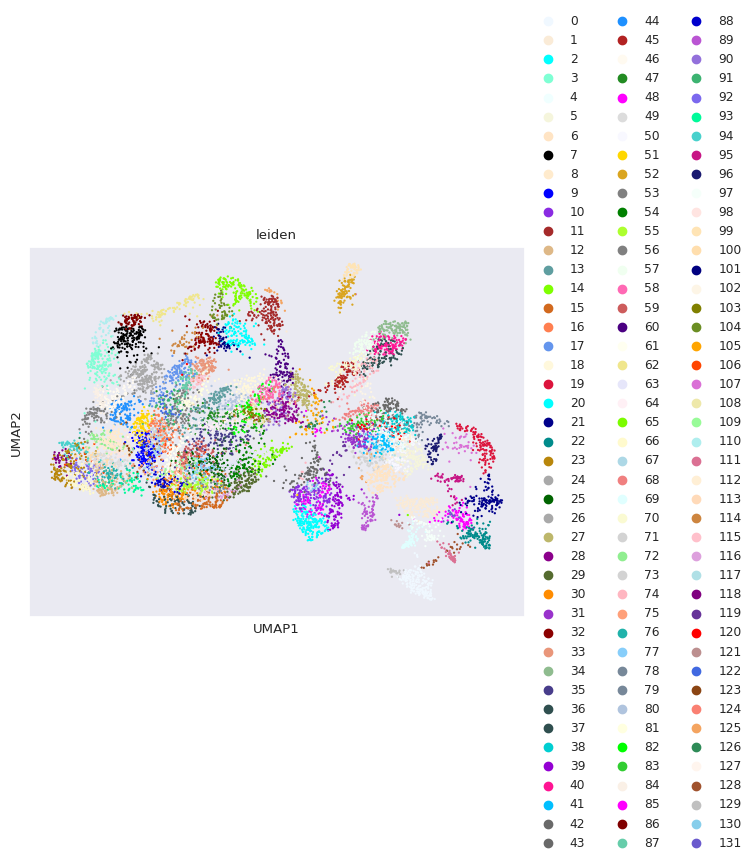

In [17]:
sc.tl.leiden(sdata.table,resolution=10,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'Kupf', 'LSEC', 'Meso',
       'Oth im', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[3, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 44, 46, 47, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 90, 91, 92, 93, 94, 98, 100, 101, 103, 104, 106, 108, 109, 110, 113, 114, 115, 116, 118, 122, 123, 124, 127]
Kupf
[34, 37, 40, 45, 57, 69, 70, 74, 102, 121]
LSEC
[4, 5, 6, 31, 38, 41, 43, 50, 71, 78, 83, 95, 96, 112, 117, 120]
Endo vein
[19, 89, 107]
Fibr
[21, 22, 48, 128, 131]
Stel
[2, 10, 39, 42, 85, 119, 130]
Meso
[]
Chol
[0, 129]
B cell
[52, 99]
Oth im
[1, 97, 111]
Unknown
[105, 125, 126]


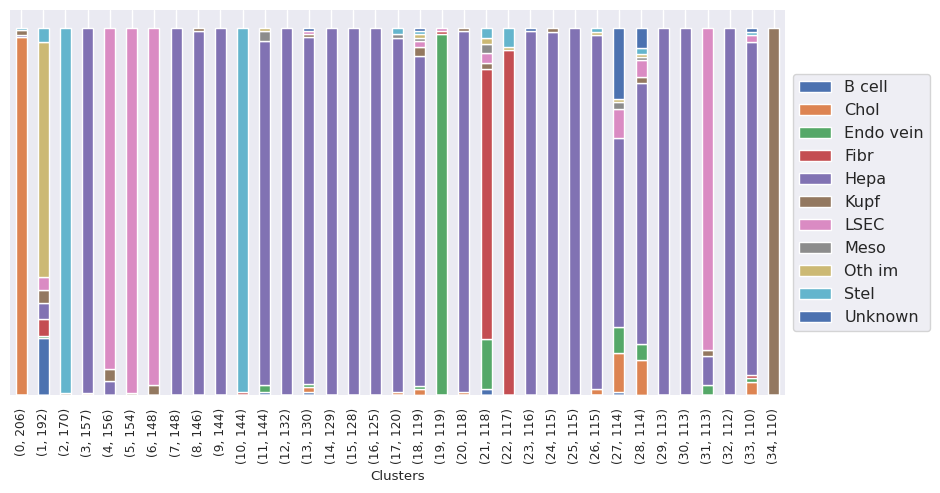

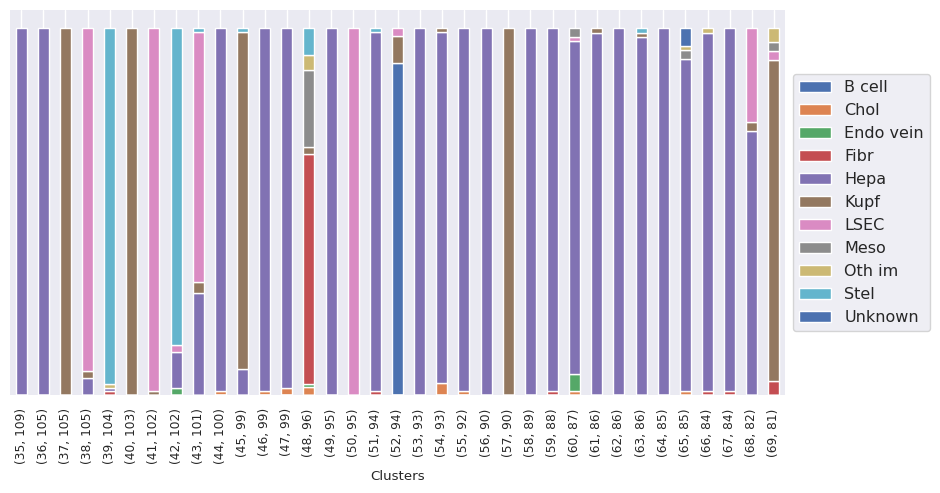

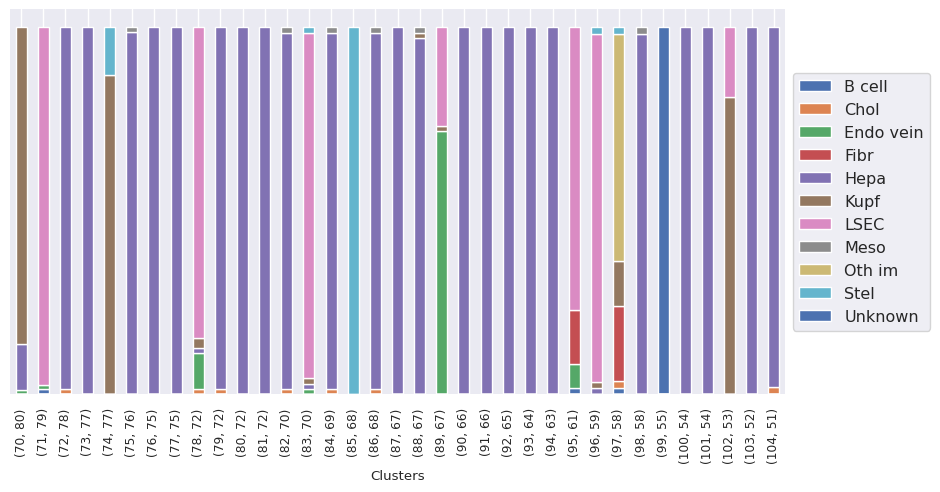

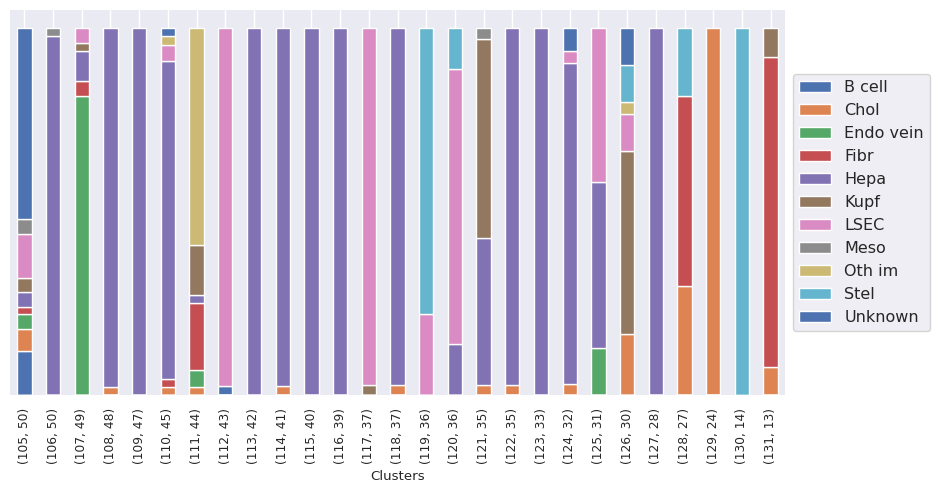

In [18]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

In [20]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
print(sdata.table.obs['leiden_cell_types'].value_counts())


Hepa         6936
LSEC         1431
Kupf          833
Stel          638
Fibr          371
Oth im        294
Endo vein     235
Chol          230
B cell        149
Unknown       111
Name: leiden_cell_types, dtype: int64


149
Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Plpp1', 'Endo vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Axl', 'Fibr'], ['Lpl', 'Fibr'], ['Des', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Plpp1', 'Fibr'], ['Pecam1', 'B cell']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein']]
Oth im
Maybe drop:[['Cd9', 'Endo vein'], ['Cd9', 'Chol']]
Summary:
Hepa
Maybe drop:[['Slc40a1', 'LSEC'], ['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Cxcl12', 'Hepa'], ['Plpp1', 'Endo vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Lpl', 'Fibr'], ['Axl', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Plpp1', 'Fibr'], ['Pecam1', 'B cell']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vei

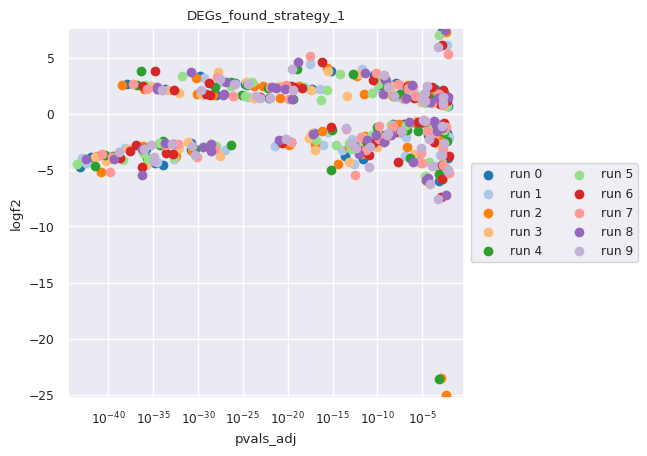

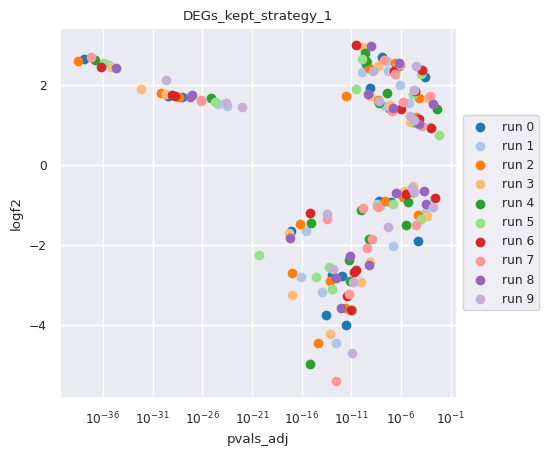

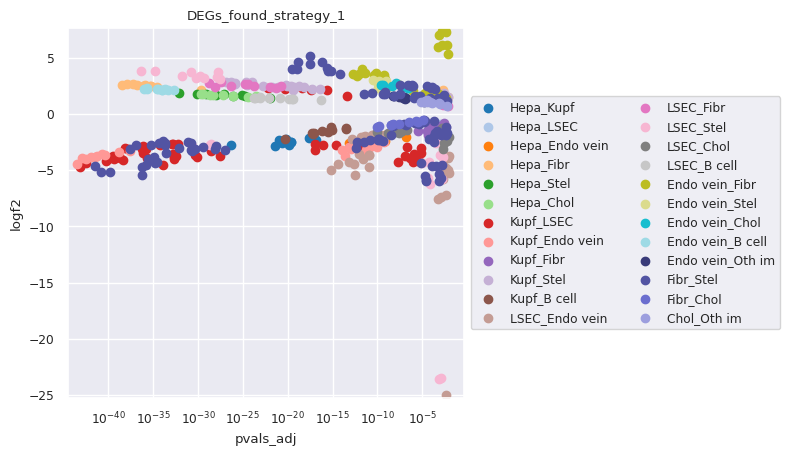

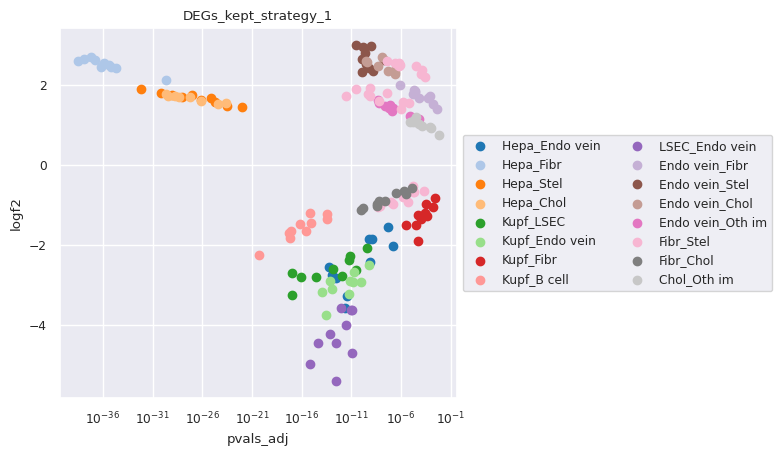

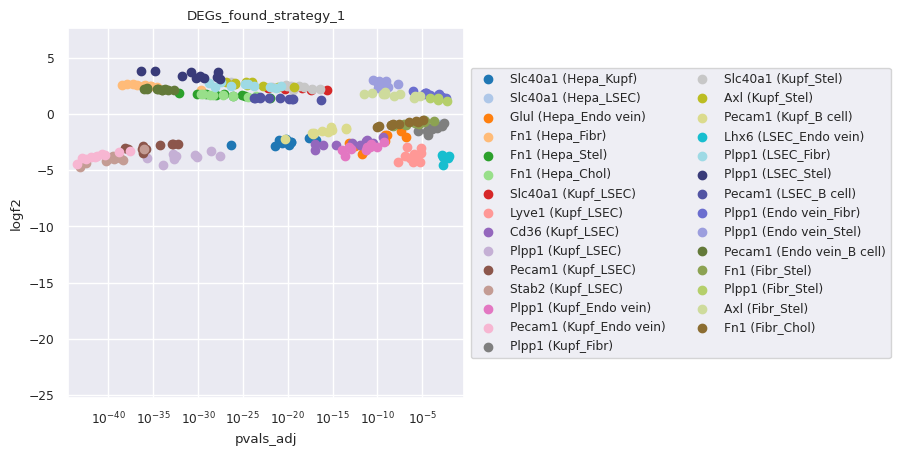

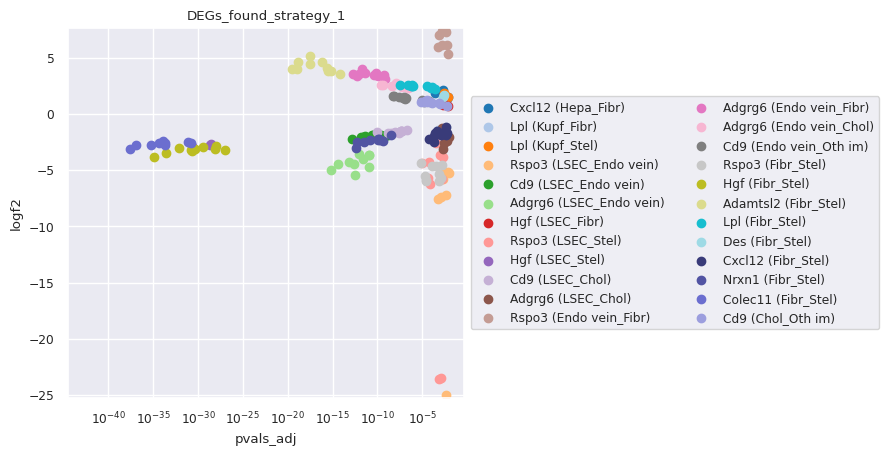

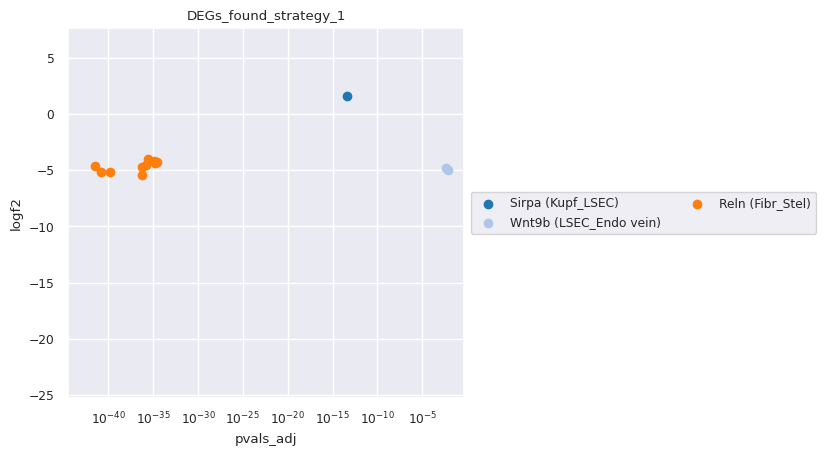

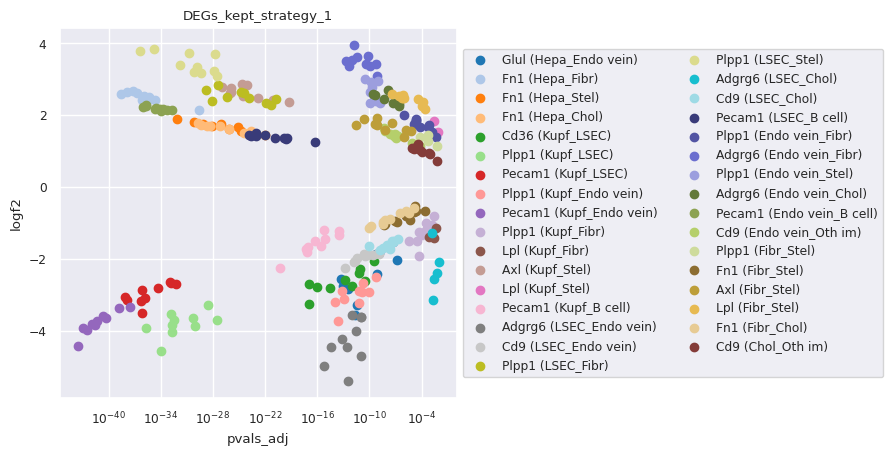

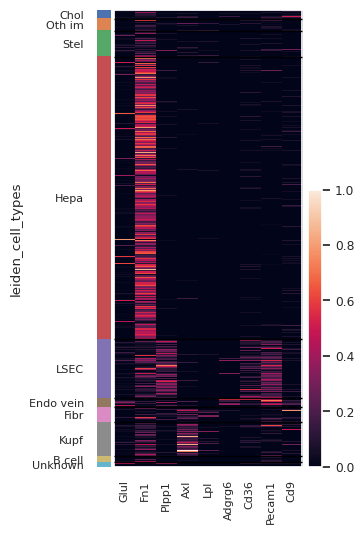

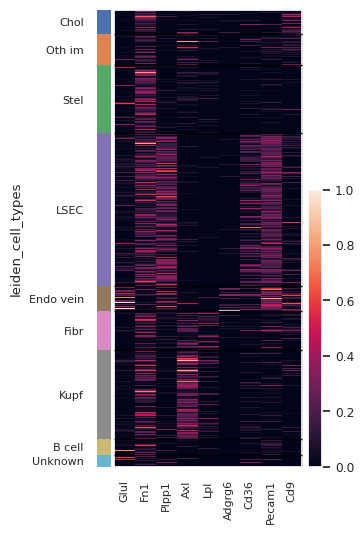

In [21]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,1)

In [22]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv")

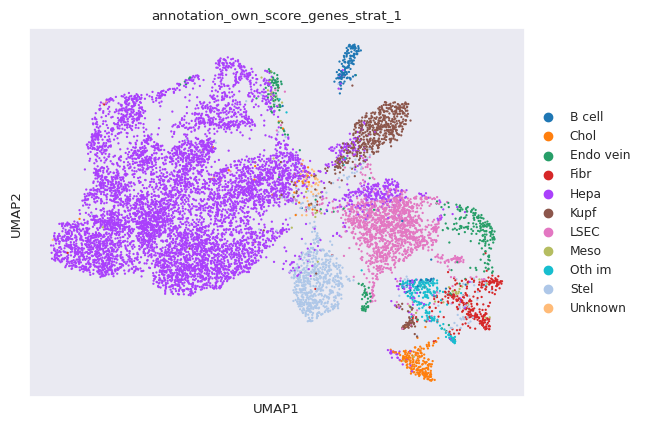

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               1.549697
Chol                                 2.155326
Endo vein                            2.752048
Fibr                                 2.547203
Hepa                                63.867118
Kupf                                 5.619879
LSEC                                12.504453
Meso                                 0.516566
Oth im                               1.834699
Stel                                 6.314571
Unknown                              0.338440


In [23]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv"
scores = own_score_genes(sdata.table,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

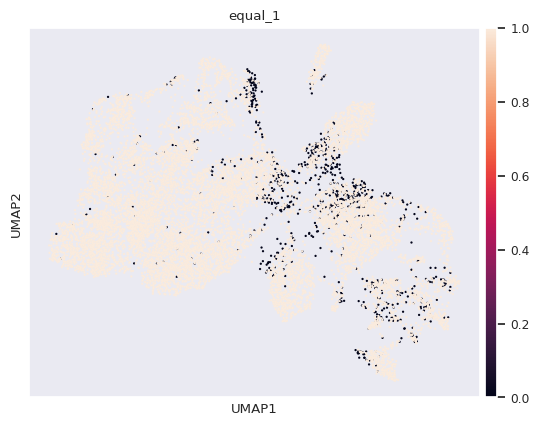

In [24]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa          8.002
LSEC          8.833
Endo vein     7.250
Chol          6.000
Kupf         18.000
Stel         13.501
Fibr         16.125
B cell        4.500
Meso          6.000
Oth im        3.000
dtype: float64


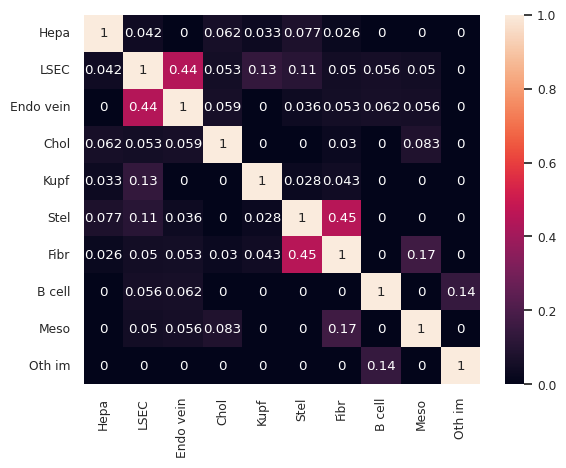

In [25]:
Jaccard_similarity_matrix(path_mg_mod1)

149
Ccr2
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Endo vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC']
Cx3cr1
Is marker gene of: []
Could also be a marker gene of: ['Chol']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Kupf', 'LSEC', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol']
Gdf15
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['LSEC']
Myh11
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr']
Ngfr
Is marker gene of: ['Stel']
Could also be a marker gene of: ['LSEC', 'B cell']
Pck1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Chol']
Sirpa
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Chol']
Summary:
Oth im
Maybe add:['Ccr2', 'Cd3e']
Endo vein
Maybe add:['

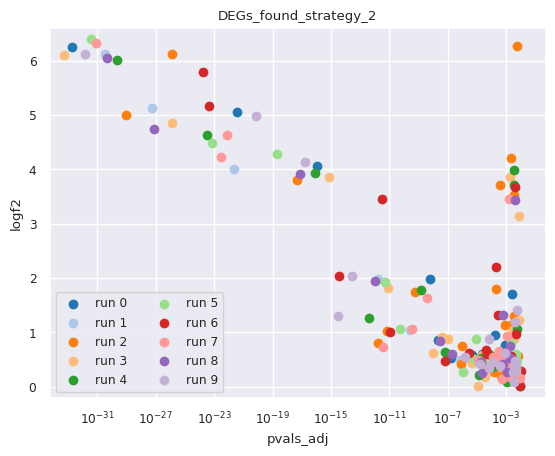

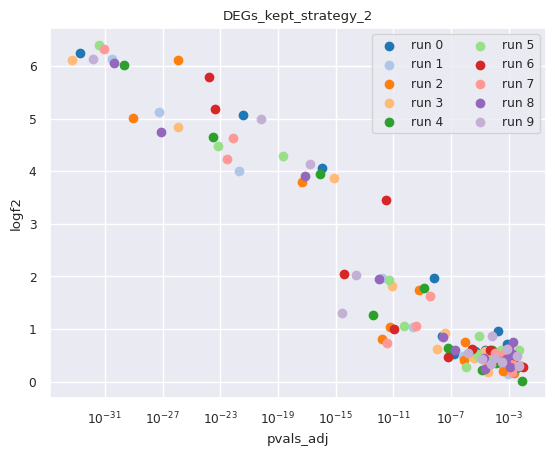

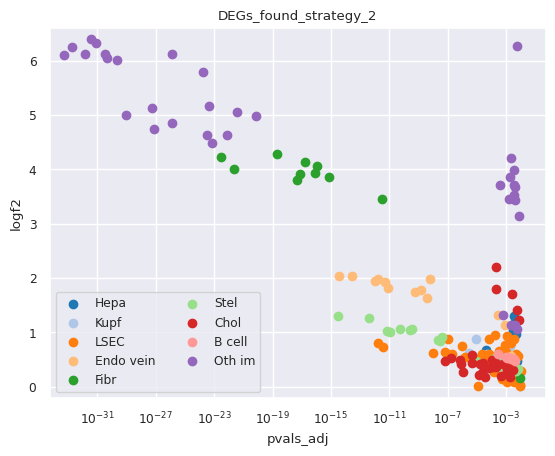

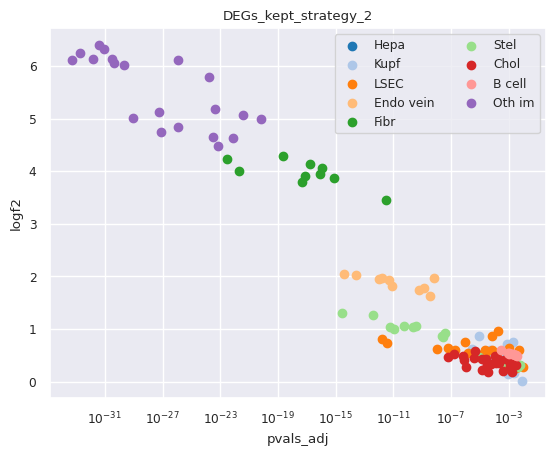

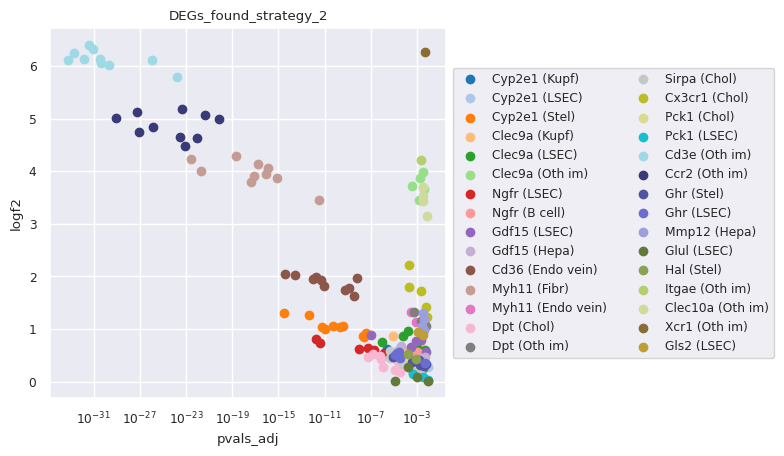

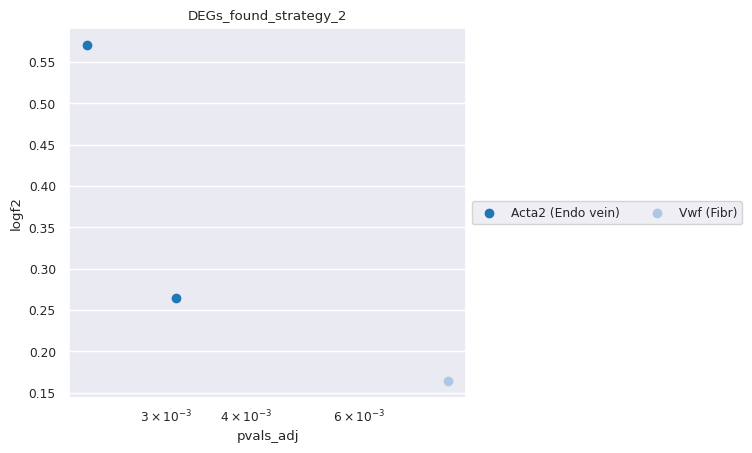

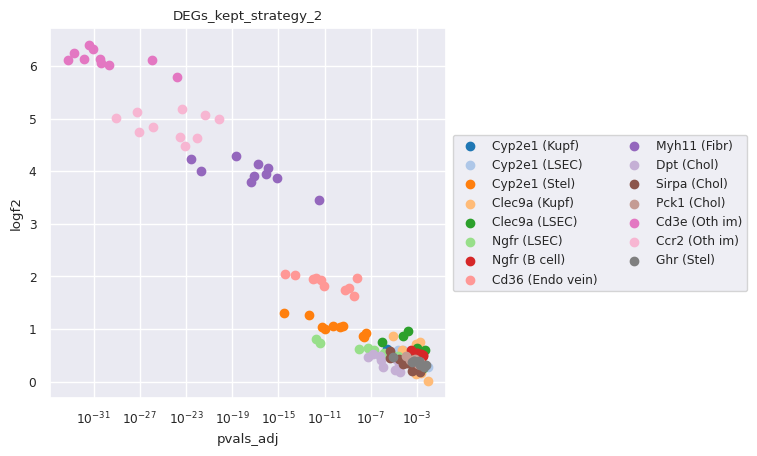

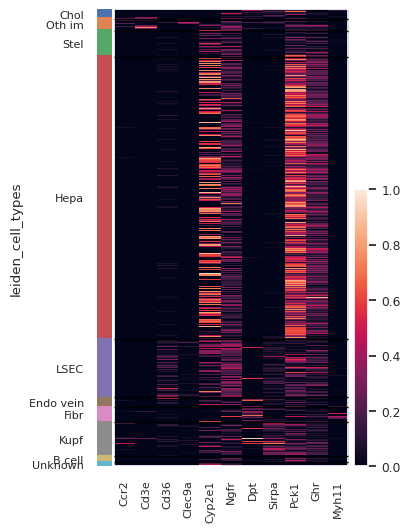

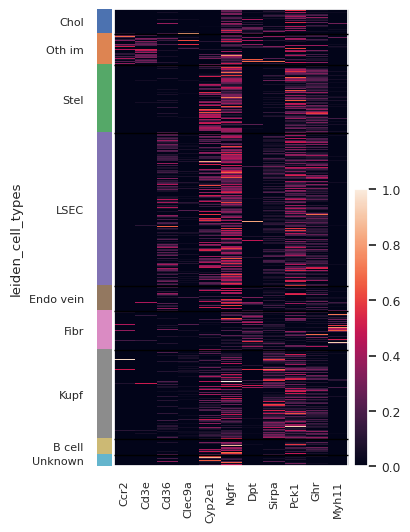

In [26]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,2)

In [27]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv")

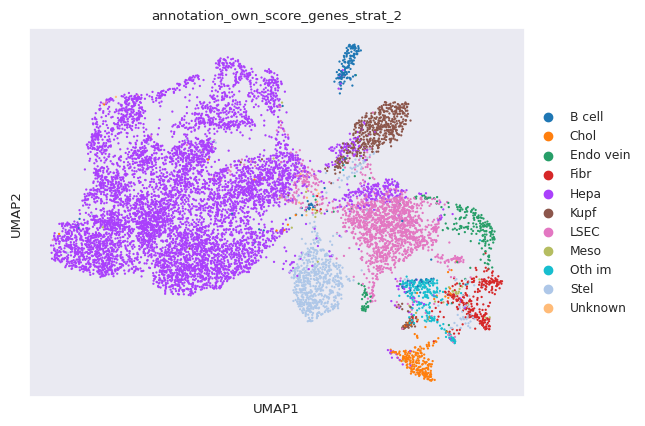

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               1.790167
Chol                                 2.306733
Endo vein                            2.092982
Fibr                                 2.475953
Hepa                                63.617741
Kupf                                 5.058782
LSEC                                13.956181
Meso                                 0.391877
Oth im                               2.012825
Stel                                 6.207695
Unknown                              0.089063


In [28]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv"
scores = own_score_genes(sdata.table,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

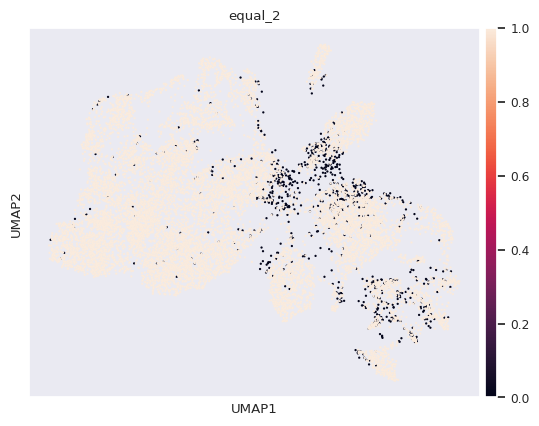

In [29]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa          8.669
LSEC         12.333
Endo vein     8.250
Chol         10.500
Kupf         21.500
Stel         18.001
Fibr         18.625
B cell        5.500
Meso          6.000
Oth im        6.000
dtype: float64


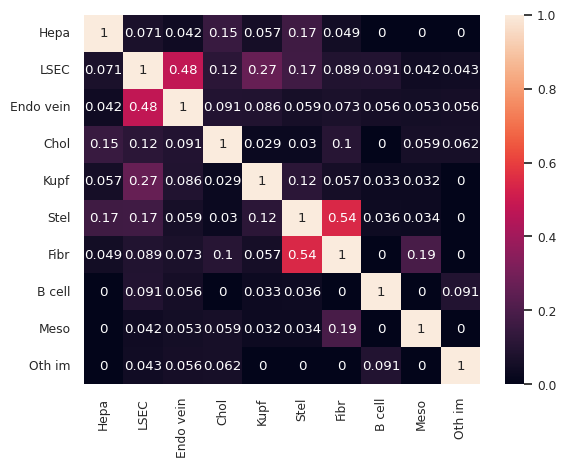

In [30]:
Jaccard_similarity_matrix(path_mg_mod2)

In [31]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [32]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv")

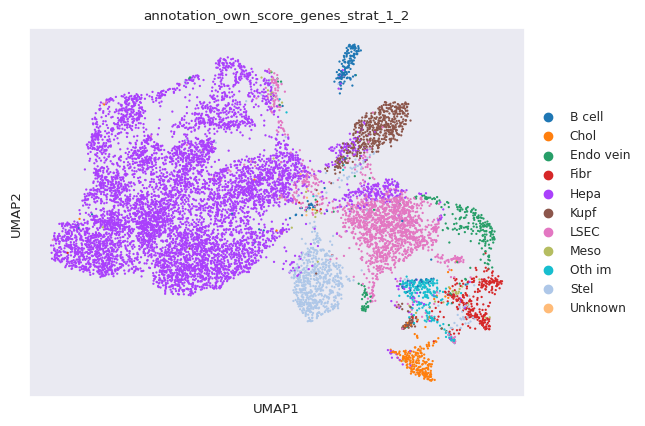

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 1.807980
Chol                                   2.217670
Endo vein                              2.324546
Fibr                                   2.591735
Hepa                                  63.181332
Kupf                                   5.103313
LSEC                                  14.294621
Meso                                   0.463128
Oth im                                 1.897043
Stel                                   6.074100
Unknown                                0.044532


In [33]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv"
scores = own_score_genes(sdata.table,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

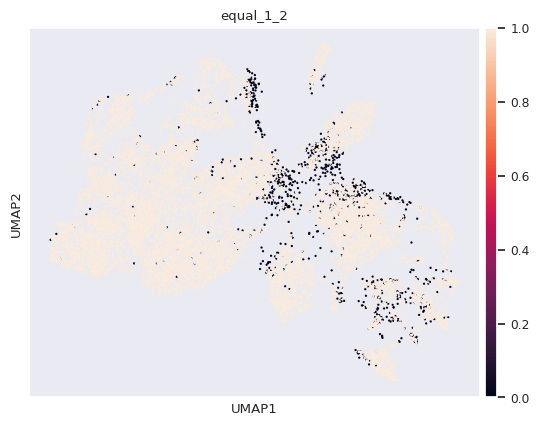

In [34]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa          8.002
LSEC         11.833
Endo vein     8.250
Chol          9.000
Kupf         20.000
Stel         15.501
Fibr         17.125
B cell        5.500
Meso          6.000
Oth im        5.000
dtype: float64


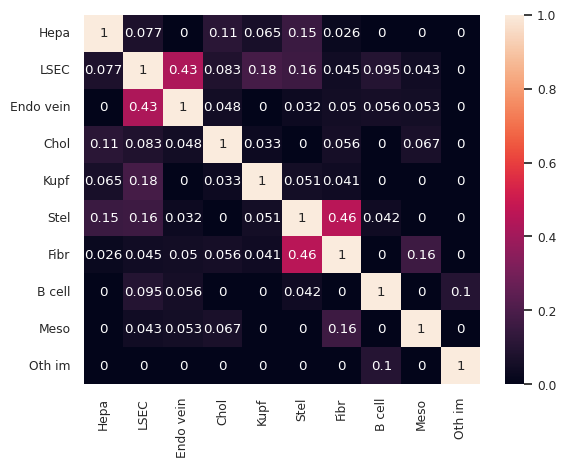

In [35]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa         0.631813
LSEC         0.142946
Stel         0.060741
Kupf         0.051033
Fibr         0.025917
Endo vein    0.023245
Chol         0.022177
Oth im       0.018970
B cell       0.018080
Meso         0.004631
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64


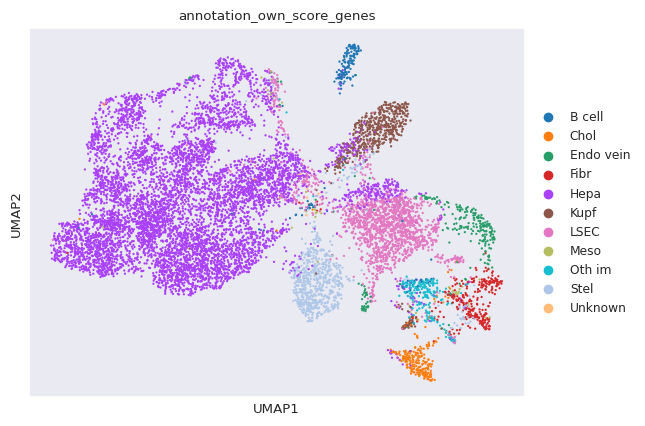

0.057000356252226575


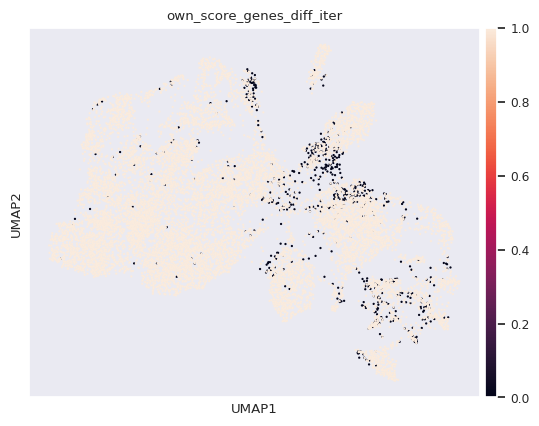

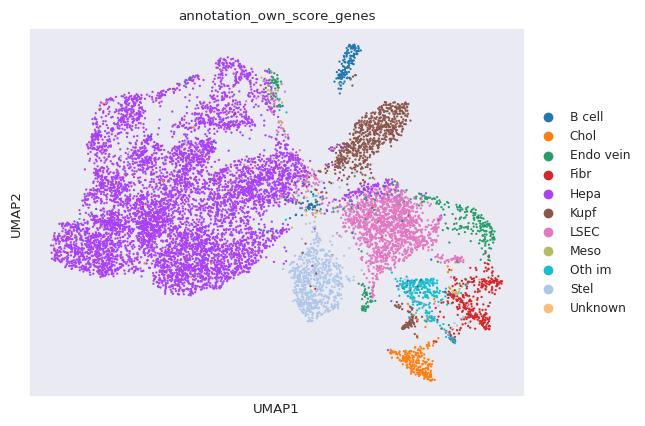

Hepa         0.605718
LSEC         0.132615
Kupf         0.070182
Stel         0.058782
Fibr         0.029925
Endo vein    0.029747
Oth im       0.023958
Chol         0.023335
B cell       0.019950
Meso         0.005344
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
0.00952974706091913


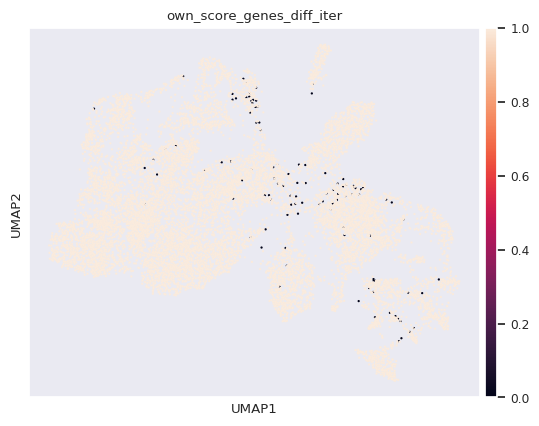

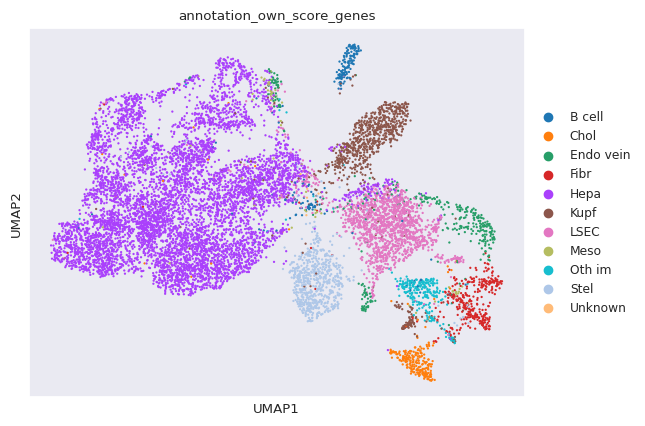

Hepa         0.601888
LSEC         0.130210
Kupf         0.073477
Stel         0.058693
Endo vein    0.031172
Fibr         0.030816
Oth im       0.023780
Chol         0.023424
B cell       0.020217
Meso         0.005878
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
0.0015140719629497684


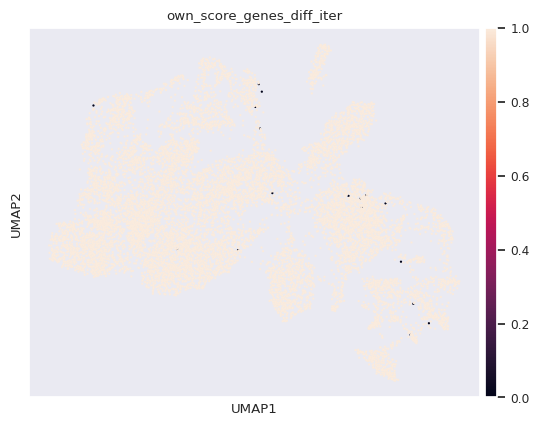

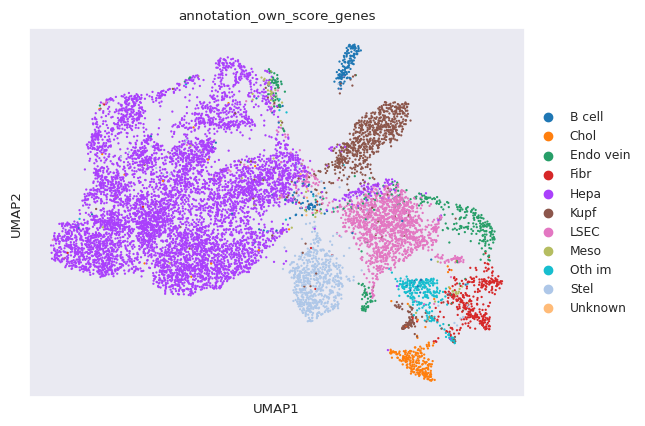

Hepa         0.601443
LSEC         0.129498
Kupf         0.073655
Stel         0.058514
Endo vein    0.031796
Fibr         0.030994
Oth im       0.023869
Chol         0.023513
B cell       0.020217
Meso         0.006056
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
0.0006234413965087282


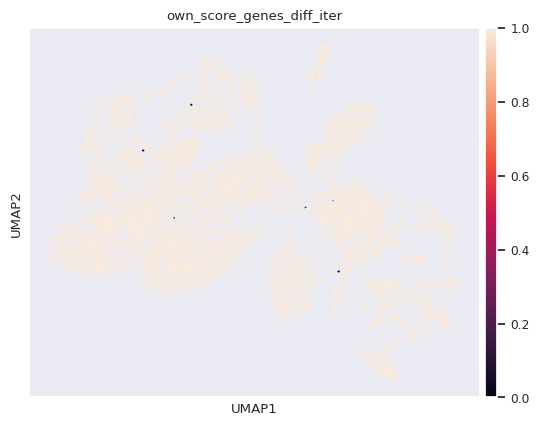

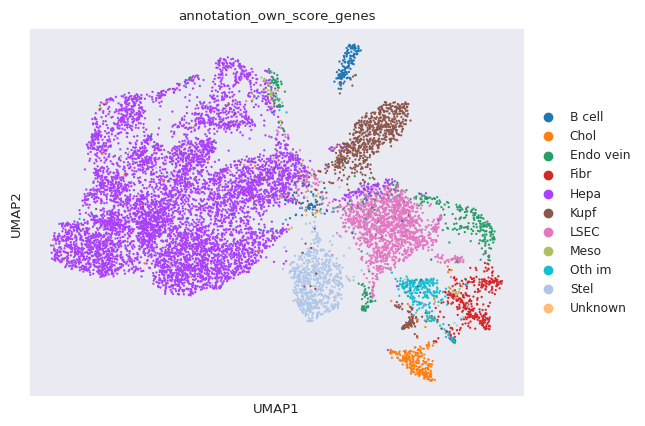

Hepa         0.601176
LSEC         0.129141
Kupf         0.073744
Stel         0.058603
Endo vein    0.031974
Fibr         0.030994
Oth im       0.023869
Chol         0.023513
B cell       0.020395
Meso         0.006145
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
0.0003562522265764161


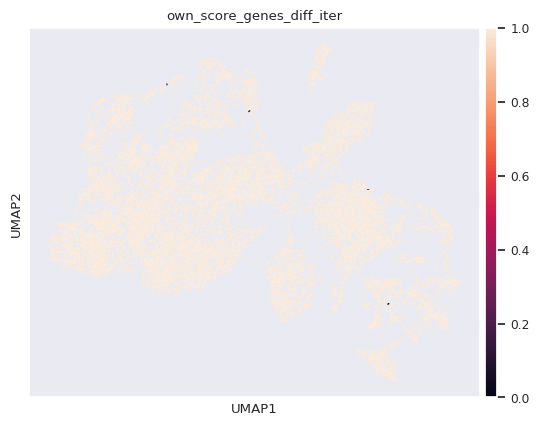

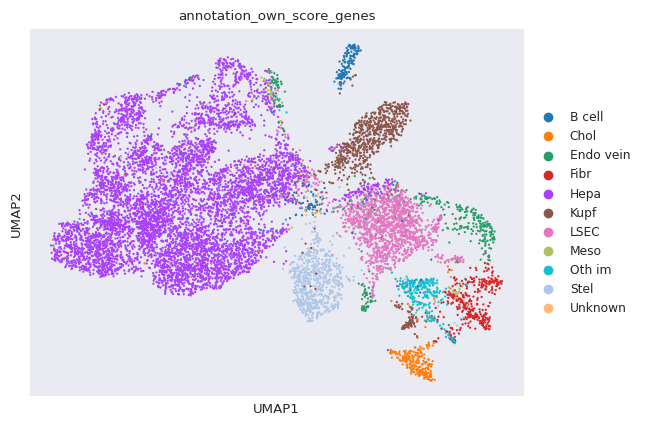

Hepa         0.601176
LSEC         0.128785
Kupf         0.073744
Stel         0.058603
Endo vein    0.032152
Fibr         0.030994
Oth im       0.023958
Chol         0.023513
B cell       0.020485
Meso         0.006145
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
0.00017812611328820805


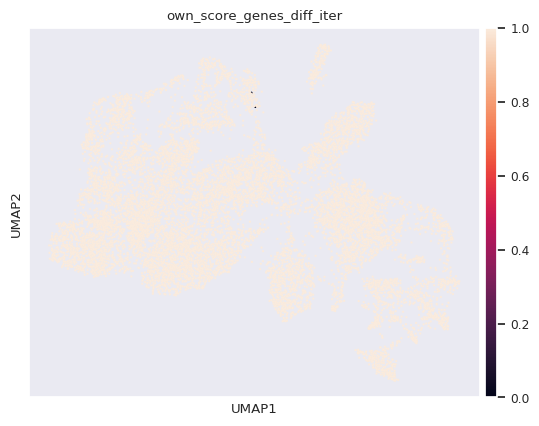

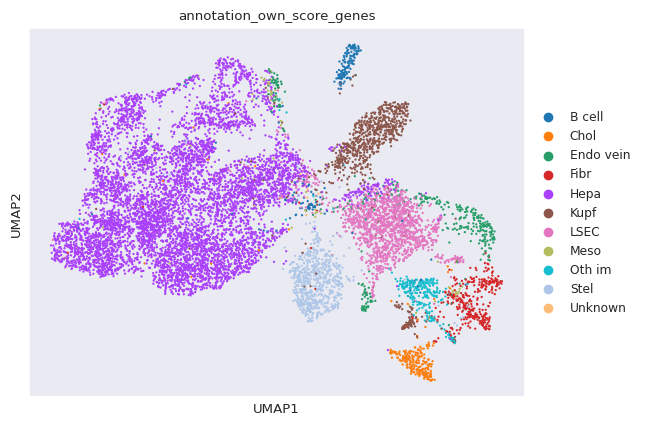

Hepa         0.601176
LSEC         0.128696
Kupf         0.073655
Stel         0.058603
Endo vein    0.032241
Fibr         0.030994
Oth im       0.023958
Chol         0.023513
B cell       0.020574
Meso         0.006145
Unknown      0.000445
Name: annotation_own_score_genes, dtype: float64
converged


[0.057000356252226575,
 0.00952974706091913,
 0.0015140719629497684,
 0.0006234413965087282,
 0.0003562522265764161,
 0.00017812611328820805,
 0]

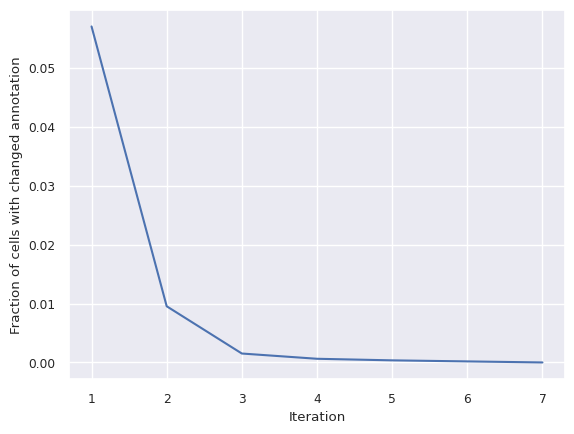

In [36]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(sdata.table,path_mg_mod_1_2,nr_iterations=8)